<a href="https://colab.research.google.com/github/Xin-overclocked/pns/blob/main/Jiaxin_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [10]:
df = pd.read_csv('/content/athlete_events.csv')

In [11]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [12]:
import missingno as msno

<Axes: >

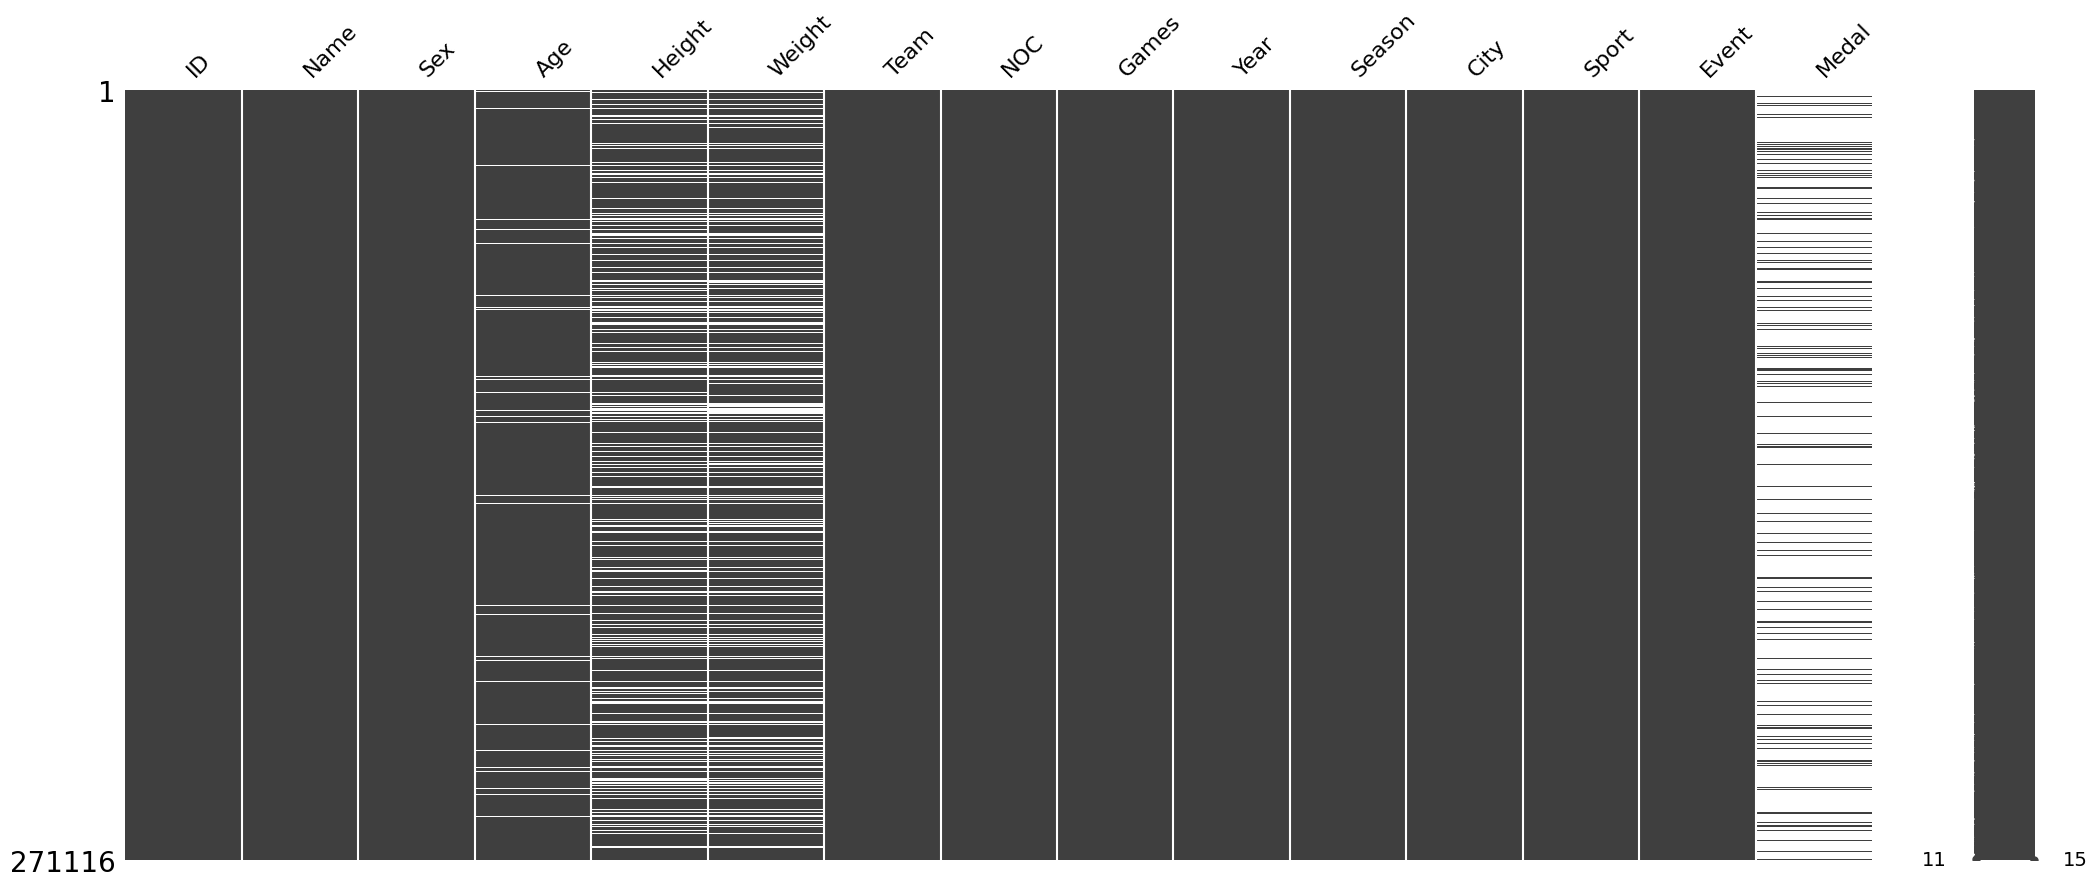

In [13]:
msno.matrix(df)

<Axes: >

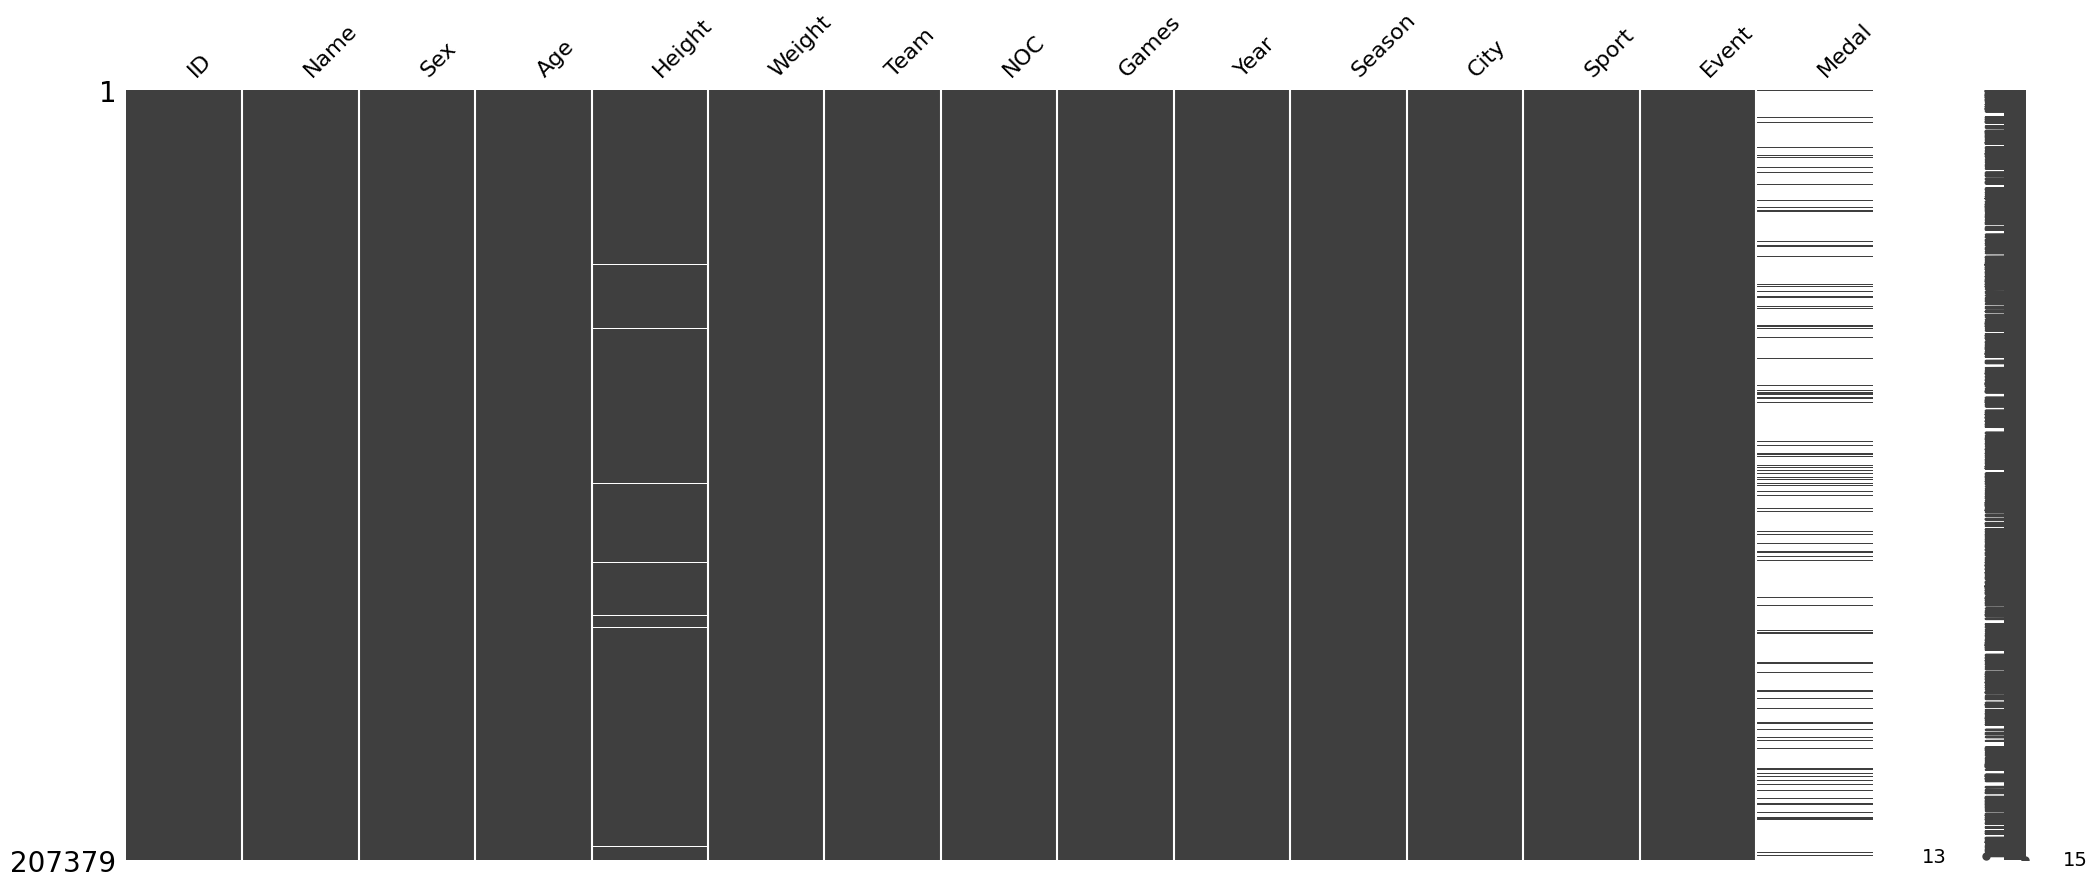

In [14]:
# Remove rows with missing values in 'Age' or 'Weight' columns
df = df.dropna(subset=['Age', 'Weight'])

# Display the updated DataFrame
df
# Visualize the missing values after removal
msno.matrix(df)

In [16]:
df.shape

(207379, 15)

In [17]:
df = df[['Age', 'Weight', 'Sport', 'Medal']]
df

,Age,Weight,Sport,Medal
0,24.0,80.0,Basketball,NaN
1,23.0,60.0,Judo,NaN
4,21.0,82.0,Speed Skating,NaN
5,21.0,82.0,Speed Skating,NaN
6,25.0,82.0,Speed Skating,NaN
...,...,...,...,...
271111,29.0,89.0,Luge,NaN
271112,27.0,59.0,Ski Jumping,NaN
271113,27.0,59.0,Ski Jumping,NaN
271114,30.0,96.0,Bobsleigh,NaN


In [18]:
df.dtypes

,0
Age,float64
Weight,float64
Sport,object
Medal,object


In [19]:
df.columns

Index(['Age', 'Weight', 'Sport', 'Medal'], dtype='object')

## Age & Weight Probability to medal

# Age

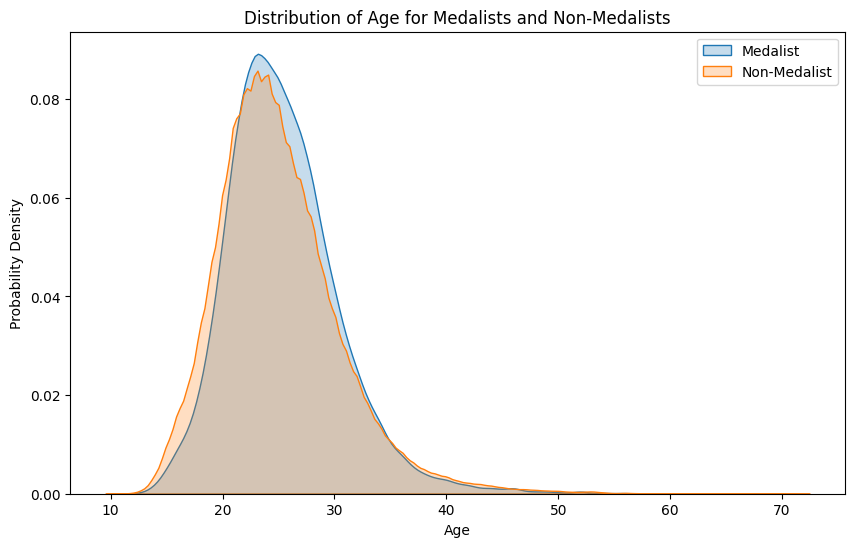

In [25]:
# relate probability of age in getting medalist and non-medalist in distribution graph

import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column 'Medal_Binary' where 1 represents a medalist and 0 represents a non-medalist
df['Medal_Binary'] = df['Medal'].apply(lambda x: 1 if pd.notna(x) else 0)

# Plot the distribution of age for medalists and non-medalists
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Medal_Binary'] == 1]['Age'], label='Medalist', fill=True)
sns.kdeplot(df[df['Medal_Binary'] == 0]['Age'], label='Non-Medalist', fill=True)
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.title('Distribution of Age for Medalists and Non-Medalists')
plt.legend()
plt.show()

## Weight

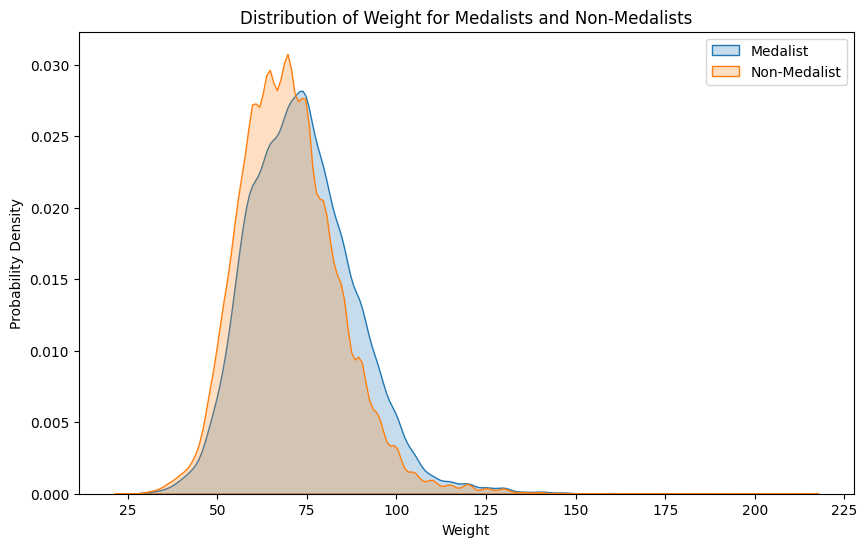

In [26]:
# relate probability of weight in getting medalist and non-medalist in distribution graph

# Weight
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Medal_Binary'] == 1]['Weight'], label='Medalist', fill=True)
sns.kdeplot(df[df['Medal_Binary'] == 0]['Weight'], label='Non-Medalist', fill=True)
plt.xlabel('Weight')
plt.ylabel('Probability Density')
plt.title('Distribution of Weight for Medalists and Non-Medalists')
plt.legend()
plt.show()